In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import mplcursors
%matplotlib inline

In [2]:
#tickers
#assets = ['PG', '^GSPC', '^BVSP']
assets = tickers = ['BBDC4.SA', 'LCAM3.SA','ABCB4.SA', 'AZUL4.SA', 'BBAS3.SA',  'BRDT3.SA', 'BRSR6.SA', 'CARD3.SA', 'CCRO3.SA', 'COGN3.SA', 'EGIE3.SA', 'EZTC3.SA', 'ITSA4.SA', 'JHSF3.SA',  'LEVE3.SA', 'MEAL3.SA', 'MOVI3.SA', 'OIBR3.SA', 'PRIO3.SA', 'RAIL3.SA', 'SAPR11.SA', 'SCAR3.SA', 'SHUL4.SA', 'TAEE11.SA', 'TECN3.SA', 'TRPL4.SA', 'VIVT4.SA', 'VULC3.SA', 'VVAR3.SA']

pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2013-1-1')['Adj Close']

In [3]:
pf_data.head()

,BBDC4.SA,LCAM3.SA,ABCB4.SA,AZUL4.SA,BBAS3.SA,BRDT3.SA,BRSR6.SA,CARD3.SA,CCRO3.SA,COGN3.SA,...,RAIL3.SA,SAPR11.SA,SCAR3.SA,SHUL4.SA,TAEE11.SA,TECN3.SA,TRPL4.SA,VIVT4.SA,VULC3.SA,VVAR3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,11.338732,1.820118,6.717008,NaN,16.081093,NaN,9.903804,3.106951,13.490128,4.019564,...,NaN,NaN,40.418976,3.829096,10.160094,22.801939,2.762144,26.977726,4.48,3.835596
2013-01-03,12.022191,1.790278,6.850108,NaN,16.398973,NaN,10.395882,3.189503,13.730898,3.922387,...,NaN,NaN,40.427952,3.965130,10.323969,22.722366,2.778635,27.249569,4.20,3.835596
2013-01-04,11.820322,1.867856,6.753521,NaN,16.199520,NaN,10.439482,3.121961,13.971667,4.054901,...,NaN,NaN,40.418976,3.929863,10.698536,22.147676,2.918804,27.293055,4.08,3.835596
2013-01-07,11.760418,1.790278,6.806670,NaN,16.299248,NaN,10.588974,3.204513,13.957504,4.054901,...,NaN,NaN,40.203358,4.060856,10.956050,21.626032,2.901488,27.293055,3.96,3.835596
2013-01-08,11.801445,1.775361,6.879047,NaN,16.486229,NaN,10.159185,3.219523,13.950424,3.887051,...,NaN,NaN,40.338108,3.975204,10.764083,21.900116,2.774510,27.401814,3.84,3.835596


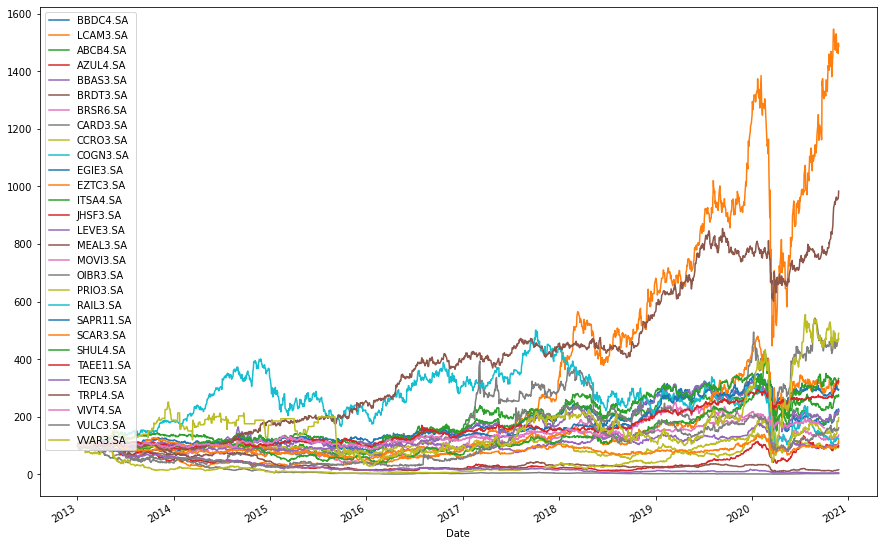

In [4]:
#normaliza os dados e plota
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(15,10))

In [5]:
#retorno log
log_returns = np.log(pf_data/pf_data.shift(1)) #retorno logaritmico

In [6]:
pf_ret = list()
pf_vol = list()
pf_sha = list()
pf_wei = list()

for x in range(9000):
    # pesos aleatorios
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    # armazena weights em uma listya
    pf_wei.append(weights)
    # retorno da iteração
    ret = np.sum(weights * log_returns.mean()) * 250
    pf_ret.append(ret)
    #volatilidade da iteração
    vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250, weights)))
    pf_vol.append(vol)
    #sharpe da iteração
    pf_sha.append(ret/vol)
    
#comverte lista para array numpy
pf_ret = np.array(pf_ret)
pf_vol = np.array(pf_vol)
pf_sha = np.array(pf_sha)

In [7]:
#melhor portfolio
print("Melhor sharpe: {}".format(pf_sha.max()))
print("Iteração melhor sharpe: {}".format(pf_sha.argmax()))
max_sharpe_ret = pf_ret[pf_sha.argmax()]
max_sharpe_vol = pf_vol[pf_sha.argmax()]
i=0
for a in assets:
    print(a + ": " + str(round(pf_wei[pf_sha.argmax()][i], 3)*100)+' %')
    i=i+1

Melhor sharpe: 0.4691089804662354
Iteração melhor sharpe: 3659
BBDC4.SA: 1.4000000000000001 %
LCAM3.SA: 7.3999999999999995 %
ABCB4.SA: 4.9 %
AZUL4.SA: 6.5 %
BBAS3.SA: 5.1 %
BRDT3.SA: 6.1 %
BRSR6.SA: 3.1 %
CARD3.SA: 0.4 %
CCRO3.SA: 0.2 %
COGN3.SA: 5.7 %
EGIE3.SA: 6.0 %
EZTC3.SA: 1.0999999999999999 %
ITSA4.SA: 6.4 %
JHSF3.SA: 0.5 %
LEVE3.SA: 1.7999999999999998 %
MEAL3.SA: 0.5 %
MOVI3.SA: 4.2 %
OIBR3.SA: 0.6 %
PRIO3.SA: 0.5 %
RAIL3.SA: 0.4 %
SAPR11.SA: 0.0 %
SCAR3.SA: 3.0 %
SHUL4.SA: 7.199999999999999 %
TAEE11.SA: 7.1 %
TECN3.SA: 2.4 %
TRPL4.SA: 7.1 %
VIVT4.SA: 5.0 %
VULC3.SA: 3.2 %
VVAR3.SA: 2.1999999999999997 %


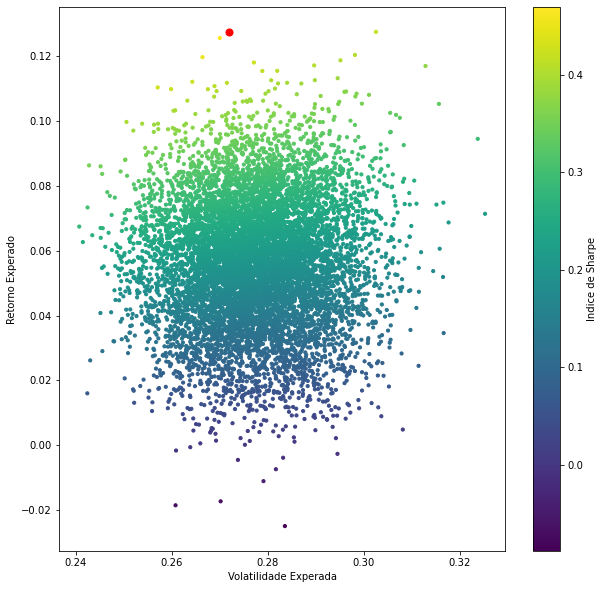

In [8]:
#grafico
plt.figure(figsize=(10,10))
plt.scatter(pf_vol, pf_ret, c=pf_sha, cmap='viridis', s=10)
plt.colorbar(label='Indice de Sharpe')
plt.xlabel('Volatilidade Experada')
plt.ylabel('Retorno Experado')
plt.scatter(max_sharpe_vol, max_sharpe_ret, c='red', s=50)
plt.show()